Alunos: Eduardo Philippe, Douglas Royer e Vítor Gabriel Eduardo

# PARTE 2: Algoritmo Árvores de Decisão

Nesta segunda parte do Trabalho você irá aplicar os algoritmos de Árvore de Decisão e de Floresta Aleatória na base de dados de risco de crédito discutida em aula. Para isso você deve primeiramente importar as bibliotecas necessárias.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1 - Importação dos dados Pré-Processados

a) importe o arquivo salvo como 'risco_credito.pkl'



In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

X_risco_credito = X_risco_credito.astype('int')
y_risco_credito = y_risco_credito.astype('int')
print(X_risco_credito, y_risco_credito)

FileNotFoundError: ignored

# 2 - Algoritmo de Árvore de Decisão



a) importar da biblioteca sklearn o pacote DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

b) Calcule a árvore de decisão, utilizando como critério a entropia.
Coloque como nome da variável: arvore_risco_credito

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy")

dt = dt.fit(X_risco_credito, y_risco_credito)


c) Utilize o feature_importances_ para retornar a importância de cada atributo. Qual possui o maior ganho de informação?

In [ ]:
print(dt.feature_importances_)

[0.41391643 0.06408636 0.03885431 0.4831429 ]


d) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS: Adicione cores, nomes para os atributos e para as classes.

In [ ]:
from sklearn import tree

[Text(0.5, 0.9, 'x[3] <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.3, 0.5, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.2, 0.3, 'x[0] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.7, 'x[0] <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.7, 0.5, 'x[0] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.8, 0.3, 'x[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.1, 'entropy = 1.0\nsamples

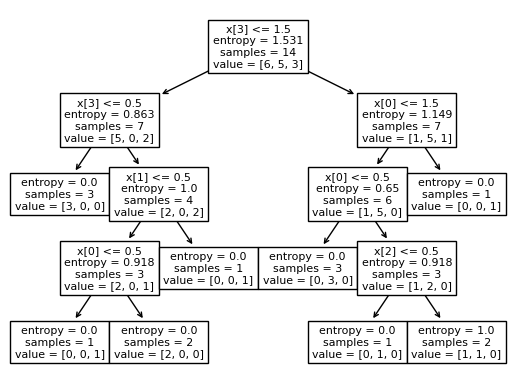

In [ ]:
dotfile = open("dtree.dot", 'w')
dotfile = tree.export_graphviz(dt, out_file = dotfile, feature_names = ['historia', 'divida', 'garantias', 'renda'])

tree.plot_tree(dt)


e) FAZER A PREVISÃO

Utilize .predict para fazer a previsão realizada no exemplo em sala.

   i. história boa, dívida alta, garantia nenhuma, renda > 35

   ii. história ruim, dívida alta, garantia adequada, renda < 15


Verifique nos slides se seu resultado está correto!

In [ ]:
X_risco_credito_test = np.array([[0,0,1,2], [2,0,0,0]])

predicao = dt.predict(X_risco_credito_test)

print(predicao)

[1 0]


#3 - Algoritmo de Árvore de Decisão para uma base de dados maior (Credit Data)

Nesta seção você deverá testar o uso da Árvore de Decisão para a Base de Dados Credit Risk Dataset. Aqui estaremos analisando os clientes que pagam (classe 0) ou não pagam a dívida (classe 1), a fim do banco conceder empréstimo.

In [ ]:
# abrir o arquivo
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

a) Ao abrir o arquivo utilize .shape para verificar o tamanho dos dados de treinamento e de teste

OBS: os dados de treinamento devem ter as seguintes dimenções: x=(1500, 3), y=(1500,); os dados de teste devem ter as seguintes dimenções: x=(500, 3), y=(500,)

In [ ]:
print(f'x={X_credit_treinamento.shape}')
print(f'y={y_credit_treinamento.shape}')
print(f'x={X_credit_teste.shape}')
print(f'y={y_credit_teste.shape}')

x=(1500, 3)
y=(1500,)
x=(500, 3)
y=(500,)


b) Importe o pacote DecisionTreeClassifier do sklearn para treinar o seu algoritmo de árvore de decisão. Para poder refazer os testes e obter o mesmo resultado utilize o parâmetro random_state = 0.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion="gini", random_state=0)
arvore_credit = arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

print(arvore_credit)

DecisionTreeClassifier(random_state=0)


c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

In [ ]:
previsao = arvore_credit.predict(X_credit_teste)
print('Resultados previstos:')
print(previsao)
print('Resultados reais:')
print(y_credit_teste)



Resultados previstos:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
acuracia = accuracy_score(y_credit_teste, previsao)
print(f'Cálculo de acurácia: {acuracia}')


Cálculo de acurácia: 0.98


e) Faça a análise da Matriz de Confusão.

i. Quantos clientes foram classificados corretamente que pagam a dívida?

ii. Quantos clientes foram classificados incorretamente como não pagantes?

iii. Quantos clientes foram classificados corretamente que não pagam?

iv. Quantos clientes foram classificados incorretamente como pagantes?

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

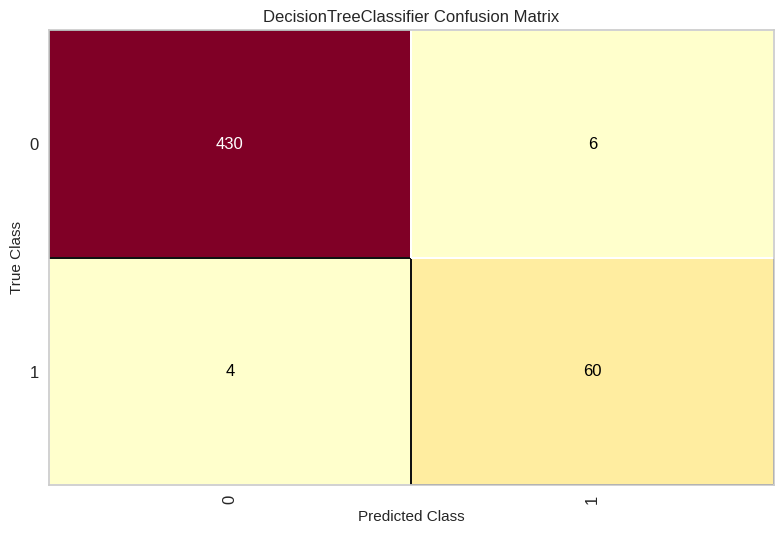

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
cm.show()

# i) 430 clientes que pagam foram classificados como pagantes
# ii) 6 clientes que pagam foram classificados como não pagantes
# iii) 60 clientes que não pagam forma classificados como não pagantes
# iv) 4 clientes que não pagam foram classificados como pagantes


f) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

In [ ]:
classification_report_data = classification_report(y_credit_teste, previsao)
print(classification_report_data)

# Esses dados se referem a uma situação em que um usuário vai ou não pagar uma divida, um falso positivo ao meu ver é muito mais grave que um falso negativo.
# Já que ao meu ver emprestar dinheiro para quem não vai pagar é um cenário pior, assumindo isso, a precisão é mais importante que o recall, claro que o recall neste caso também é importante
# Porém ele não tanto quanto a precisão, dito isso, é um erro a precisão estar mais baixa que o recall, embora ainda esteja bem alta.
#

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.94      0.92        64

    accuracy                           0.98       500
   macro avg       0.95      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



g) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS: Adicione cores, nomes para os atributos e para as classes. Você pode utilizar a função fig.savefig para salvar a árvore em uma imagem .png

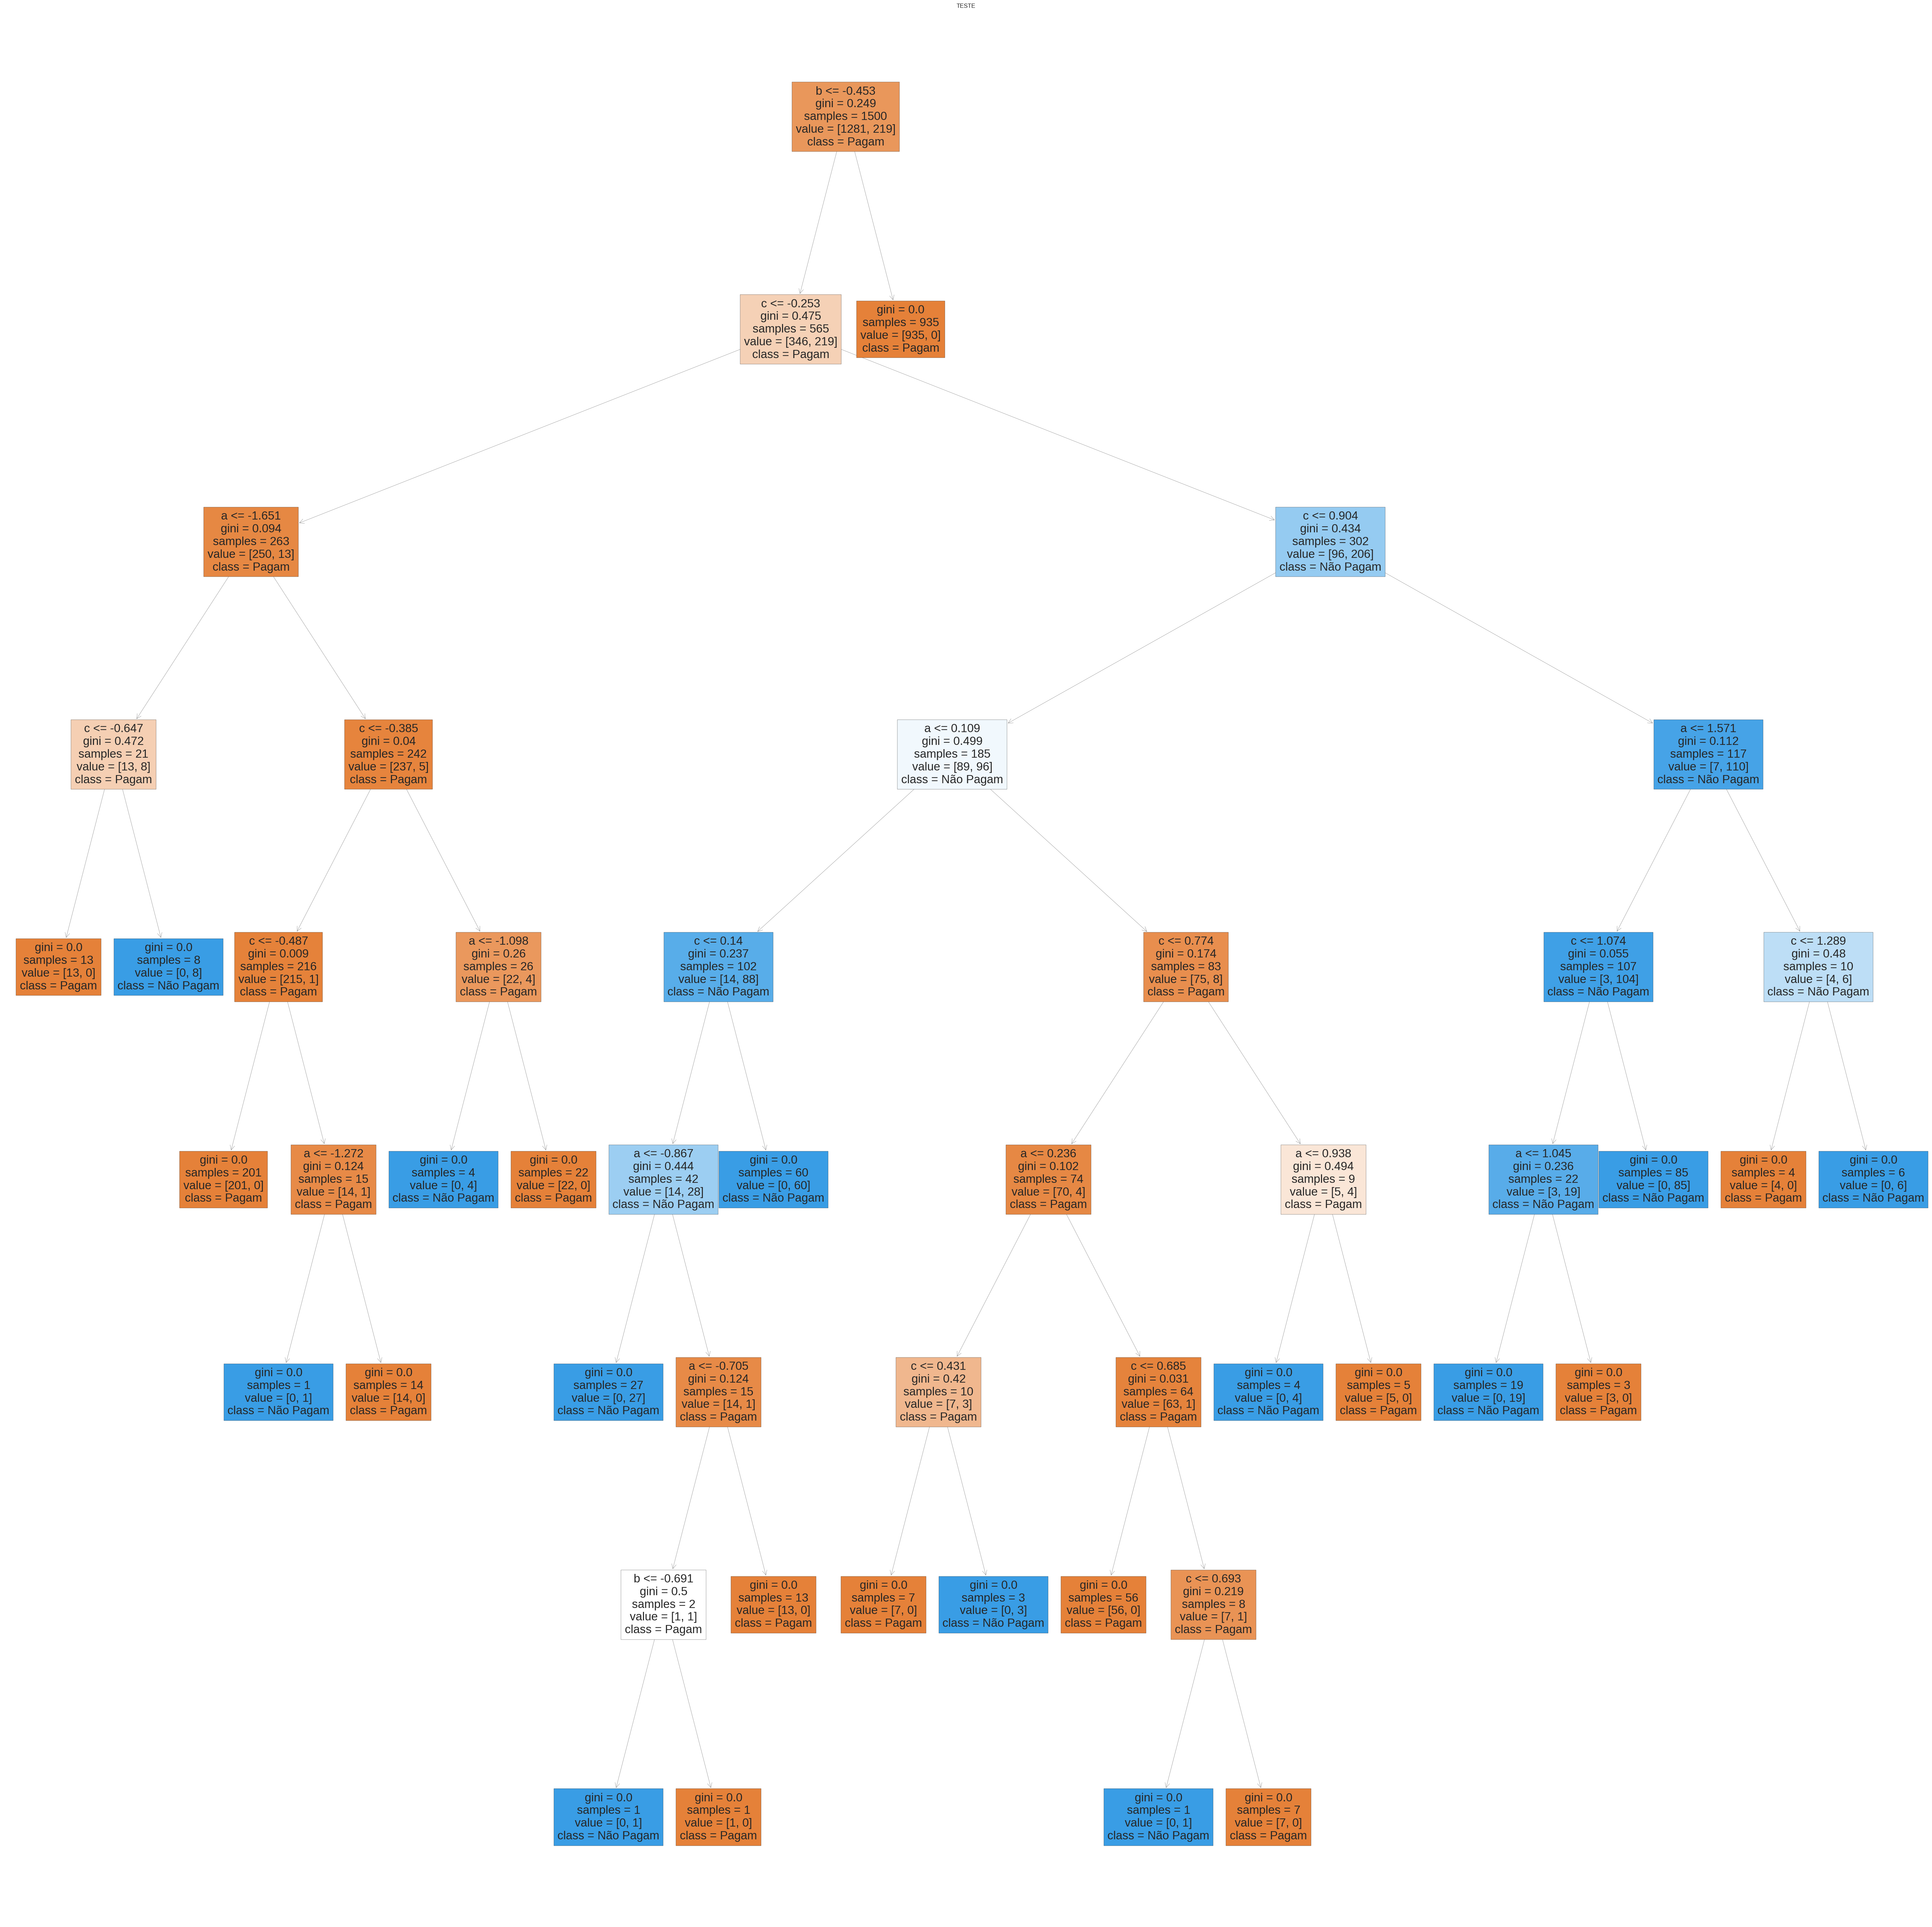

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
from IPython.display import Image
import pydotplus
from sklearn.tree import plot_tree


fig = plt.figure(figsize = (70, 70))

tree.plot_tree(arvore_credit, filled = True, class_names = ['Pagam', 'Não Pagam'], feature_names = ["a","b","c"])

plt.show()

fig.savefig("teste.png")



# Algoritmo Random Forest

Nesta seção iremos utilizar o algoritmo Random Forest para a mesma base de crédito (**Credit Risk Dataset**) - arquivo *credit.pkl*.

a) Importe o pacote RandomForestClassifier do sklearn para treinar o seu algoritmo de floresta randomica.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

b) Para gerar a classificação você deve adicionar alguns parâmetros:
*   n_estimators=10  --> número de árvores que você irá criar
*   criterion='entropy'
*   random_state = 0

In [ ]:
rfc = RandomForestClassifier(10, criterion='entropy', random_state=0)
rfc.fit(X_credit_treinamento, y_credit_treinamento)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

In [ ]:
y_credit_predict_rfc = rfc.predict(X_credit_teste)

print('Resultados previstos:')
print(y_credit_predict_rfc)
print('Resultados reais:')
print(y_credit_teste)


Resultados previstos:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões. O resultado foi melhor do que a árvore de decisão simples?

In [ ]:
acuracia = accuracy_score(y_credit_teste, y_credit_predict_rfc)
print(f'Cálculo de acurácia: {acuracia}')

# A árvore de decisão simples tem uma acurácia melhor que a floresta randomica

Cálculo de acurácia: 0.968


e) Se o resultado foi inferior, como você poderia resolver isso? Quais foram os resultados obtidos?


Aqui se faz o teste com:
40 árvores - o melhor resultado 0.984
mas pode fazer com 100 (default), com 50 e 70.

In [ ]:
def TreinamentoFlorestaRandomica(qtd):
  rfc = RandomForestClassifier(qtd, criterion='entropy', random_state=0)
  rfc.fit(X_credit_treinamento, y_credit_treinamento)
  y_credit_predict_rfc = rfc.predict(X_credit_teste)
  acuracia = accuracy_score(y_credit_teste, y_credit_predict_rfc)
  print(f'Cálculo de acurácia: {acuracia}')

TreinamentoFlorestaRandomica(40)
TreinamentoFlorestaRandomica(100)
TreinamentoFlorestaRandomica(50)
TreinamentoFlorestaRandomica(70)


Cálculo de acurácia: 0.984
Cálculo de acurácia: 0.982
Cálculo de acurácia: 0.98
Cálculo de acurácia: 0.982



f) Faça a análise da Matriz de Confusão.

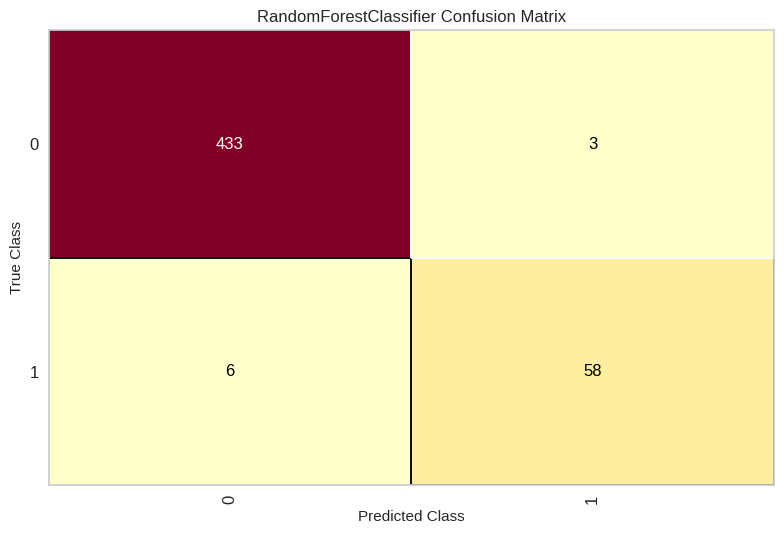

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(rfc)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
cm.show()

# i) 433 clientes que pagam foram classificados como pagantes
# ii) 3 clientes que pagam foram classificados como não pagantes
# iii) 58 clientes que não pagam forma classificados como não pagantes
# iv) 6 clientes que não pagam foram classificados como pagantes


g) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

In [ ]:
classification_report_data = classification_report(y_credit_teste, y_credit_predict_rfc)
print(classification_report_data)

# em relação as previsões dos que podem pagar estão muito boas,
# Para os que não pagam, seria importante ter um número maior de precisão do que de recall, nesse caso os dois estão altos e número de precisão está mais alto ainda, então eu acho que esse é um modelo bem refinado para aplicação

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.91      0.93        64

    accuracy                           0.98       500
   macro avg       0.97      0.95      0.96       500
weighted avg       0.98      0.98      0.98       500

